# Lab 7 - Joining and Analyzing Movie and Review Data

## 1. Data Preparation and Exploration:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Data Preparation and Exploration: 
movies = pd.read_csv('movies.csv')
movies

,movie_id,title,genre,release_year
0,1,The Shawshank Redemption,Drama,1999
1,2,The Godfather,Drama,1987
2,3,The Dark Knight,Drama,1993
3,4,Schindler's List,Crime,2002
4,5,Pulp Fiction,Action,1980
...,...,...,...,...
95,96,The Sixth Sense,Drama,1999
96,97,The Social Network,Crime,2001
97,98,Slumdog Millionaire,Drama,1994
98,99,Life of Pi,Action,2017


In [4]:
reviews = pd.read_csv('reviews.csv')
reviews

,review_id,movie_id,reviewer,rating,review_date
0,1,96,Jane Doe,8.0,2020-02-17
1,2,90,Victor Scott,1.8,2020-08-22
2,3,32,Yara Baker,1.8,2020-03-10
3,4,77,Victor Scott,5.2,2020-04-24
4,5,16,Mia Martinez,6.3,2020-04-13
...,...,...,...,...,...
295,296,67,Zane Carter,9.6,2020-06-20
296,297,54,Charlie Davis,5.4,2020-06-04
297,298,10,Liam Garcia,3.5,2020-05-16
298,299,11,Uma King,3.0,2020-02-04


In [41]:
# Data cleaning
movies.isnull().sum() # Check null values
#movies_clean = movies_clean.drop_duplicates() # remove duplicate rows
#movies_clean['rating'] = pd.to_numeric(movies_clean['rating'], errors='coerce') #Make sure the column is numeric

movie_id        0
title           0
genre           0
release_year    0
dtype: int64

In [43]:
reviews.isnull().sum() # check null values

review_id      0
movie_id       0
reviewer       0
rating         0
review_date    0
dtype: int64

## 2. Highest Rated Movies:

In [158]:
# Perform an inner join on the movies and reviews dataframes based on the  movie_id column. 
inner_join = pd.merge(movies,reviews, on='movie_id')
inner_join

,movie_id,title,genre,release_year,review_id,reviewer,rating,review_date
0,1,The Shawshank Redemption,Drama,1999,40,Ivy White,4.4,2020-04-04
1,1,The Shawshank Redemption,Drama,1999,151,Quinn Walker,7.7,2020-01-23
2,1,The Shawshank Redemption,Drama,1999,153,Sophia Allen,9.0,2020-01-27
3,1,The Shawshank Redemption,Drama,1999,167,Henry Harris,8.7,2020-06-17
4,3,The Dark Knight,Drama,1993,129,Uma King,9.8,2020-03-12
...,...,...,...,...,...,...,...,...
295,99,Life of Pi,Action,2017,12,Olivia Clark,4.8,2020-07-23
296,99,Life of Pi,Action,2017,257,Olivia Clark,2.1,2020-04-22
297,100,The Aviator,Sci-Fi,2004,77,Mia Martinez,8.3,2020-01-17
298,100,The Aviator,Sci-Fi,2004,78,Kathy Thompson,6.5,2020-10-13


In [31]:
# Calculate the average rating for each movie.
average_rating = inner_join.groupby('title')['rating'].mean().reset_index().round(2)
average_rating

,title,rating
0,3 Idiots,3.30
1,A Beautiful Mind,7.62
2,A Clockwork Orange,7.30
3,Alien,3.13
4,Aliens,5.40
...,...,...
91,Vertigo,9.35
92,WALL-E,6.00
93,Whale Rider,4.25
94,Whiplash,7.30


In [18]:
# Identify the top 10 highest-rated movies
# Displays the titles and average rating of these top 10 movies
top10 = average_rating.nlargest(10, 'rating')
top10 

,title,rating
66,The Dark Knight,9.80
91,Vertigo,9.35
17,City Lights,9.25
35,Jaws,8.60
28,Grave of the Fireflies,8.00
56,Scarface,8.00
69,The Empire Strikes Back,8.00
44,North by Northwest,7.65
1,A Beautiful Mind,7.62
45,Oldboy,7.50


## 3. Genre Analysis: 

In [26]:
# Group the joined dataframe by genre and calculate the average rating for each genre. 
average_rating2 = inner_join.groupby('genre')['rating'].mean().reset_index().round(2)
average_rating2

,genre,rating
0,Action,5.11
1,Biography,5.28
2,Crime,4.90
3,Drama,5.20
4,Fantasy,5.77
5,Sci-Fi,6.12


In [33]:
# Determine which genre has the highest average rating. 
# Display the genres along with their average ratings. 
top1 = average_rating2.nlargest(1, 'rating')
top1

,genre,rating
5,Sci-Fi,6.12


## 4. Reviewer Analysis:

In [148]:
# Identify the top 5 reviewers who have given the most reviews. 
# Calculate the average rating given by each of these top 5 reviewers.
# Display the reviewer names and their average ratings. 

top5_reviewers = inner_join.groupby('reviewer')['rating'].agg(reviews='count',rating='mean').sort_values(by='reviews', ascending=False)
top5_reviewers.nlargest(5, 'reviews').round(2)

,reviews,rating
reviewer,,
Tom Young,18,5.40
Uma King,16,5.50
Henry Harris,15,4.47
John Smith,14,4.54
Yara Baker,13,5.71


## 5. Time-Based Analysis: 

In [210]:
# Analyze how movie ratings have changed over time. 
inner_join['review_date'] = pd.to_datetime(inner_join['review_date'], errors='coerce')

# Group the joined dataframe by the month extracted from the review_date column and calculate the average rating for each month. 
inner_join['month'] = inner_join['review_date'].dt.month
average_rating_by_month = inner_join.groupby('month')['rating'].mean().reset_index()
average_rating_by_month

,month,rating
0,1,5.209677
1,2,4.755172
2,3,5.583871
3,4,5.213333
4,5,6.048387
5,6,5.623333
6,7,5.338710
7,8,4.858065
8,9,5.456667
9,10,5.138462


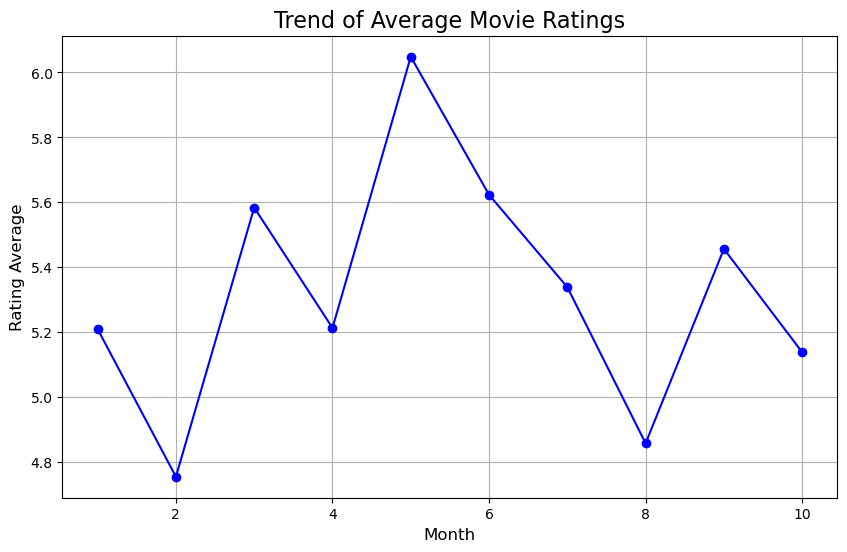

In [206]:
# Create a line plot showing the trend of average movie ratings over time. Discuss any observable trends. 

plt.figure(figsize=(10, 6))
plt.plot(average_rating_by_month['month'], average_rating_by_month['rating'], marker='o', color='b')

plt.title('Trend of Average Movie Ratings', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Rating Average', fontsize=12)
plt.grid(True)
plt.show()


#### According to the graph, it can be seen that the highest scores are in the months of May and June, this could be due to the influence of films released during this period, but as we have no information on this, it is an important point to investigate further about the reasons for this result.

## 6. Movies with Most Reviews: 

In [195]:
# Identify the top 10 movies that have received the most reviews. 
#Display the titles of these movies along with the number of reviews they have received.
reviews_count = inner_join.groupby('title')['review_id'].agg(review='count').sort_values(by='review', ascending=False)
reviews_count.nlargest(10, 'review')

,review
title,
Full Metal Jacket,7
Interstellar,7
Paths of Glory,6
It's a Wonderful Life,6
Memento,6
The Truman Show,6
Shutter Island,6
The Revenant,6
Capernaum,6


## 7. Distribution of Ratings:

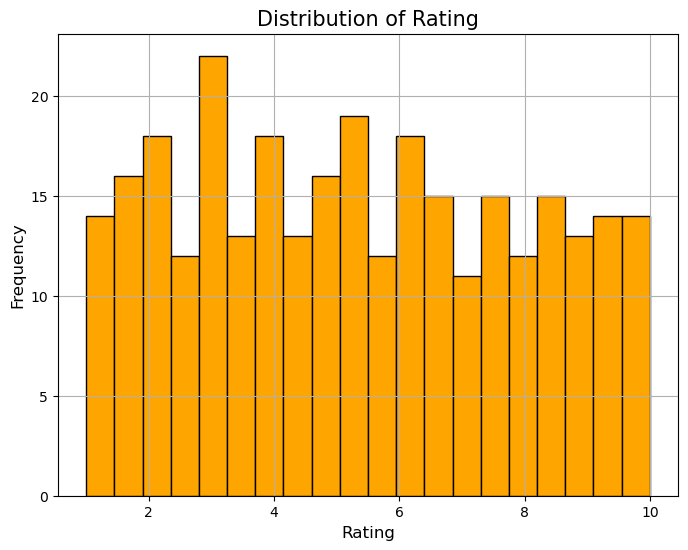

In [213]:
# Create a histogram to visualize the distribution of ratings. 
plt.figure(figsize=(8, 6))
plt.hist(inner_join['rating'], bins=20, edgecolor='black', color='orange')

plt.title('Distribution of Rating', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(True)
plt.show()

# Analyze the distribution and discuss any skewness or patterns observed in the ratings


## 8. Impact of Release Year: 

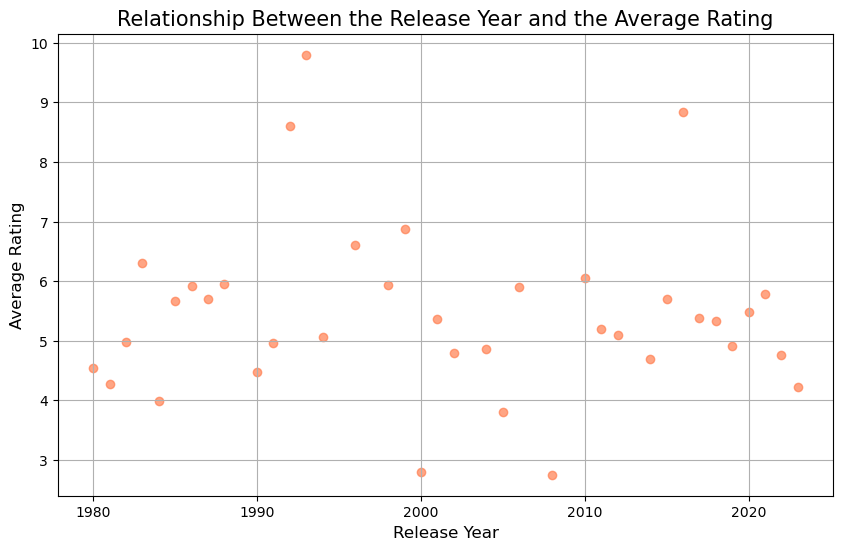

In [101]:

# Analyze if there is any correlation between the release year of a movie and its average rating. 
average_rating_by_year = inner_join.groupby('release_year')['rating'].mean().reset_index()

# Create a scatter plot showing the relationship between the release year and the average rating. 
plt.figure(figsize=(10, 6))
plt.scatter(average_rating_by_year['release_year'], average_rating_by_year['rating'], color='coral', alpha=0.7)
plt.title('Relationship Between the Release Year and the Average Rating', fontsize=15)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(True)
plt.show()

# Discuss any observable patterns or correlations. 


## 9. Reviewer Consistency:

In [225]:
# For each reviewer, calculate the standard deviation of their ratings. 
reviewer_consistency = inner_join.groupby('reviewer')['rating'].std().reset_index()
reviewer_consistency.columns = ['reviewer', 'std_dev_rating']

# Identify the most and least consistent reviewers based on the standard deviation of their ratings. 
most_consistent = reviewer_consistency.loc[reviewer_consistency['std_dev_rating'].idxmin()]
least_consistent = reviewer_consistency.loc[reviewer_consistency['std_dev_rating'].idxmax()]

print("Most Consistent:")
print(f"Name: {most_consistent['reviewer']}, standard deviation: {most_consistent['std_dev_rating']:.2f}")

print("\nLeast Consistent:")
print(f"Name: {least_consistent['reviewer']}, standard deviation: {least_consistent['std_dev_rating']:.2f}\n")

# Display the names of these reviewers along with their standard deviations. 
print(reviewer_consistency.sort_values(by='std_dev_rating'))


Most Consistent:
Name: Noah Robinson, standard deviation: 1.77

Least Consistent:
Name: Zane Carter, standard deviation: 3.57

          reviewer  std_dev_rating
14   Noah Robinson        1.773415
7        Ivy White        1.875449
16      Paul Lewis        1.913984
22    Victor Scott        1.940003
13    Mia Martinez        2.092773
10      John Smith        2.127373
5        Grace Lee        2.192273
2    Charlie Davis        2.205145
24    Xander Adams        2.214598
18       Ryan Hall        2.221255
3      Emily Evans        2.277645
12     Liam Garcia        2.314586
17    Quinn Walker        2.323360
11  Kathy Thompson        2.426857
15    Olivia Clark        2.438290
20       Tom Young        2.556652
4     Frank Wilson        2.596618
6     Henry Harris        2.610273
23     Wendy Green        2.708807
9         Jane Doe        2.718823
19    Sophia Allen        2.719473
21        Uma King        2.742748
8      Jack Martin        2.849389
1        Bob Brown        2.96168

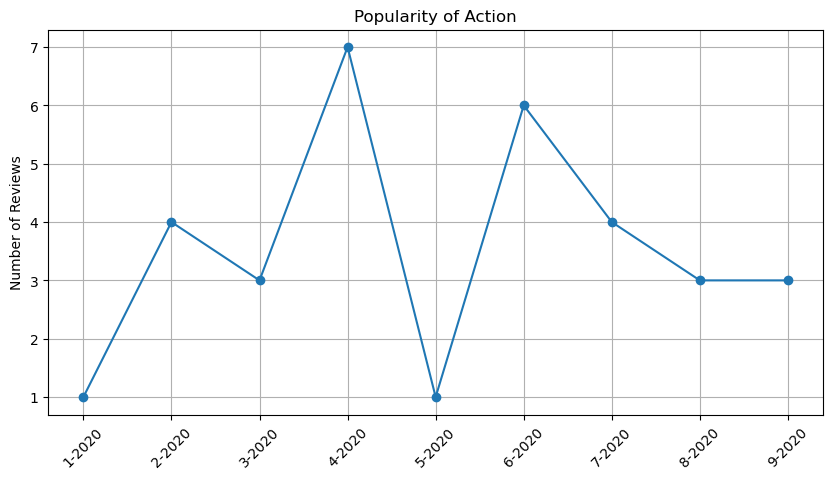

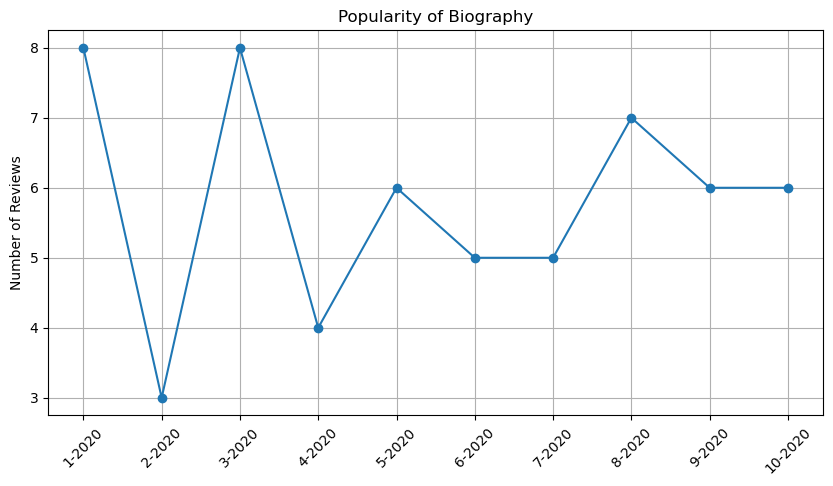

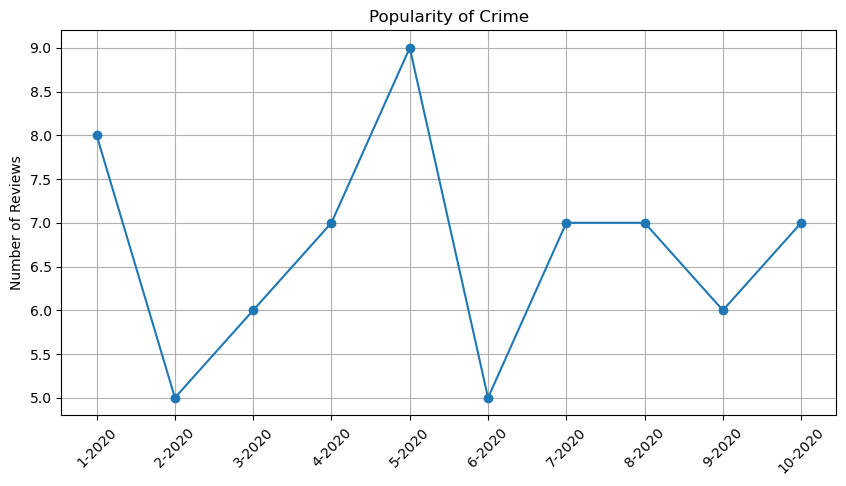

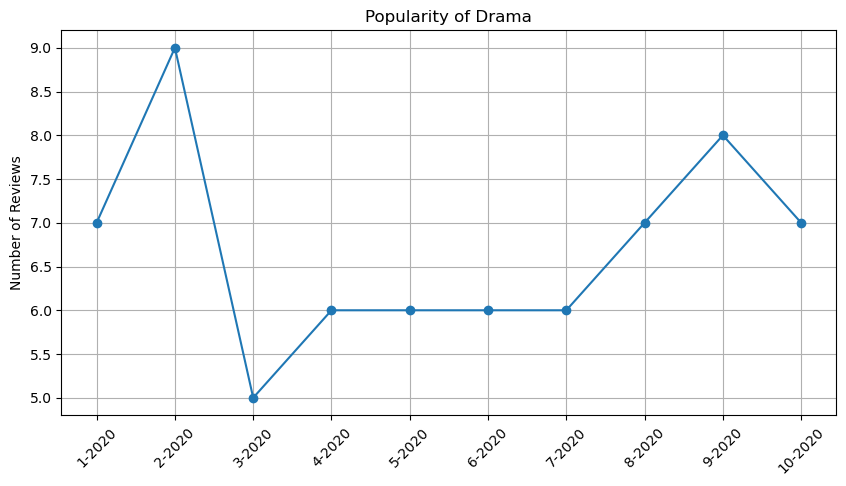

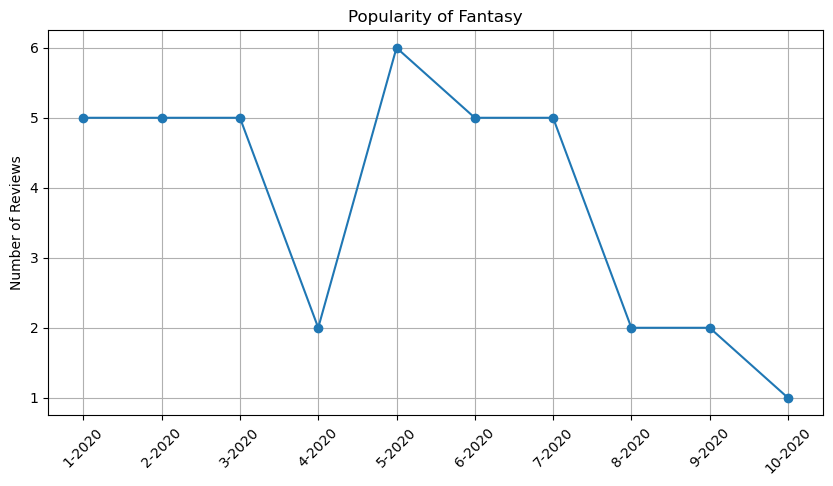

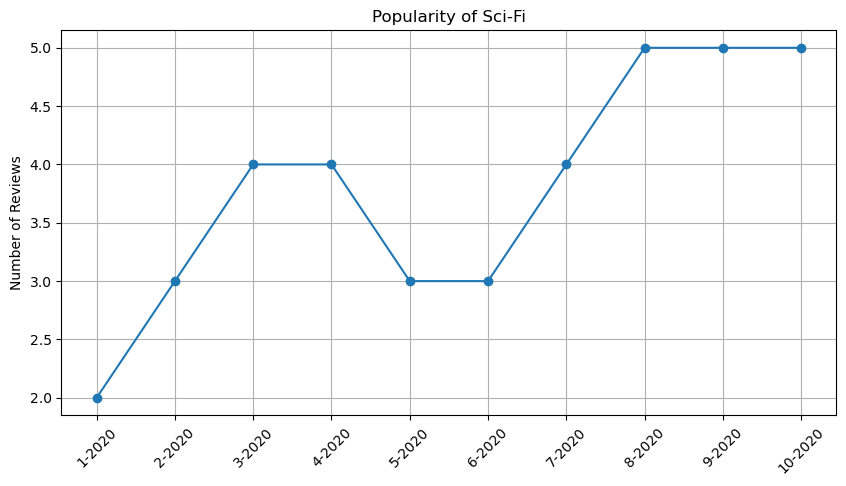

In [253]:
# 10. Challenge Task - Genre Popularity Over Time: 

# Analyze how the popularity of different genres has changed over time. 
# Group the joined dataframe by genre and the year extracted from the  review_date column. 
# Calculate the number of reviews for each genre per month. 
# Create a line plot for each genre showing the number of reviews over time. Discuss any trends or shifts in genre popularity over time. 

inner_join['year'] = inner_join['review_date'].dt.year
genre_popularity = inner_join.groupby(['genre', 'year', 'month']).size().reset_index(name='review_count')

genres = genre_popularity['genre'].unique()

# Chart for each genre
for genre in genres:
    genre_data = genre_popularity[genre_popularity['genre'] == genre]
    
    plt.figure(figsize=(10, 5))
    plt.plot(genre_data['month'].astype(str) + '-' + genre_data['year'].astype(str), genre_data['review_count'], marker='o')
    plt.title(f'Popularity of {genre}')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

## The popularity of the movies in general does not have a consistent line, presenting ups and downs over time. The graph suggests a seasonal that may be influenced by the release of films by genre in this period. An example is the action film which has its peak of popularity in April and an abrupt drop in the following month, as well as the crime genre between May and June.